In [1]:
#import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from wordcloud import WordCloud

## 1.**Loading the Dataset**

In [2]:
df=pd.read_excel(r"/content/dataset -P543.xlsx")
# Display basic info
print(f"Total reviews: {len(df)}")
print("\nFirst few reviews:")
df.head()


Total reviews: 1440

First few reviews:


,title,rating,body
0,Horrible product,1,Very disappointed with the overall performance...
1,Camera quality is not like 48 megapixel,3,Camera quality is low
2,Overall,4,"Got the mobile on the launch date,Battery must..."
3,A big no from me,1,1. It doesn't work with 5.0GHz WiFi frequency....
4,Put your money somewhere else,1,"Not worth buying....faulty software, poor disp..."


In [3]:
#Initial Data Inspection

# Check the shape (rows, columns)
print("Dataset shape:", df.shape)

# Display DataFrame info to see data types and non-null counts
print("\nDataFrame Info:")
df.info()

# List the column names
print("\nColumns:")
print(df.columns.tolist())


Dataset shape: (1440, 3)

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   1440 non-null   object
 1   rating  1440 non-null   int64 
 2   body    1440 non-null   object
dtypes: int64(1), object(2)
memory usage: 33.9+ KB

Columns:
['title', 'rating', 'body']


In [4]:
#Descriptive Statistics

# For numerical columns:
print("Summary Statistics (Numerical Data):")
print(df.describe())

# For categorical data (if you have object columns):
print("\nSummary Statistics (Categorical Data):")
print(df.describe(include=['object']))


Summary Statistics (Numerical Data):
            rating
count  1440.000000
mean      3.173611
std       1.584453
min       1.000000
25%       1.000000
50%       4.000000
75%       5.000000
max       5.000000

Summary Statistics (Categorical Data):
                  title                                               body
count              1440                                               1440
unique             1351                                               1440
top     Value for money  Good phone for budget buyers. Sound quality is...
freq                 16                                                  1


## **Check for Missing Values**

In [5]:
# Check for missing values
df.isnull().sum()

,0
title,0
rating,0
body,0


## **Text cleaning and preprocessing**

In [6]:
# Clean the data
df = df.dropna()  # Remove any empty rows
df['body'] = df['body'].astype(str)  # Ensure all reviews are strings

In [7]:
# Sentiment analysis function
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

In [8]:
# Apply sentiment analysis
df['sentiment'] = df['body'].apply(get_sentiment)

In [9]:
# Common issues mentioned in negative reviews
negative_df = df[df['sentiment'] == 'Negative']
common_issues = {
    'camera': negative_df['body'].str.contains('camera', case=False).sum(),
    'battery': negative_df['body'].str.contains('battery', case=False).sum(),
    'slow': negative_df['body'].str.contains('slow', case=False).sum(),
    'lag': negative_df['body'].str.contains('lag', case=False).sum(),
    'wifi': negative_df['body'].str.contains('wifi', case=False).sum(),
    'heavy': negative_df['body'].str.contains('heavy', case=False).sum()
}

print("\nCommon issues in negative reviews:")
for issue, count in common_issues.items():
    print(f"{issue.capitalize()}: {count} mentions")


Common issues in negative reviews:
Camera: 144 mentions
Battery: 98 mentions
Slow: 61 mentions
Lag: 16 mentions
Wifi: 23 mentions
Heavy: 36 mentions


# Sample positive and negative reviews


In [10]:
print("\nSample Positive Review:")
print(df[df['sentiment'] == 'Positive'].sample(1)['body'].values[0])
print("\nSample Negative Review:")
print(df[df['sentiment'] == 'Negative'].sample(1)['body'].values[0])


Sample Positive Review:
My husband gifted this phone to my Mother. And she just love it. As we all know, Samsung is very user friendly . Any elder person who doesn’t know much about smart phones also can handle it very easily. We ordered blue one And the colour is lovely too. Any one who want 100% latest features with minimal cost can blindly go for it.

Sample Negative Review:
Pathetic experience  with Samsung.Really samsung is zero in Android...I will not recommend any one to buy the Samsung brand phones ....It's a wastage of money 💰....I have brought 3 phones of Samsung brand,and in all phones there is hanging ,phone heating ,net slow 🐌 and bugs issue .  frequently


# **2. EDA Visualizations**

# Plot sentiment distribution


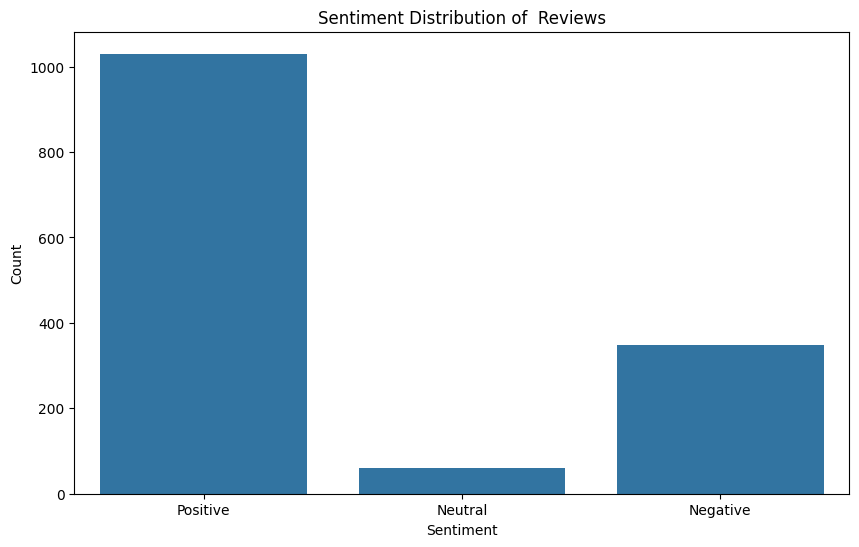

In [11]:
plt.figure(figsize=(10, 6))
sns.countplot(x='sentiment', data=df, order=['Positive', 'Neutral', 'Negative'])
plt.title('Sentiment Distribution of  Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Rating vs Sentiment analysis


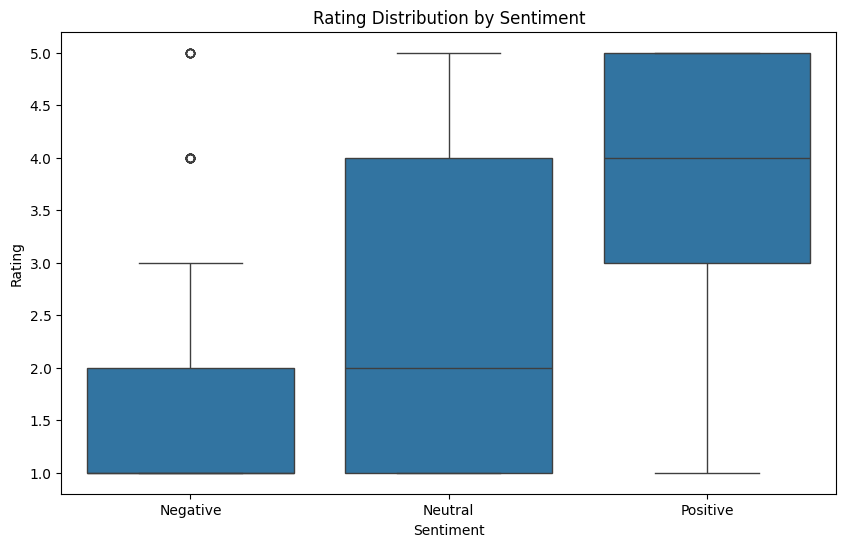

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='sentiment', y='rating', data=df)
plt.title('Rating Distribution by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Rating')
plt.show()

# Word cloud for positive reviews


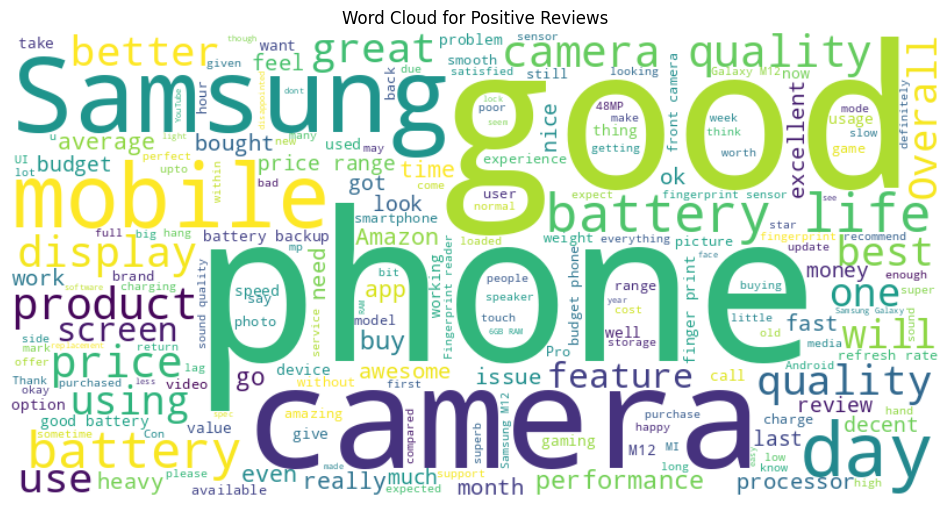

In [13]:
positive_reviews = ' '.join(df[df['sentiment'] == 'Positive']['body'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Reviews')
plt.show()

# Word cloud for negative reviews


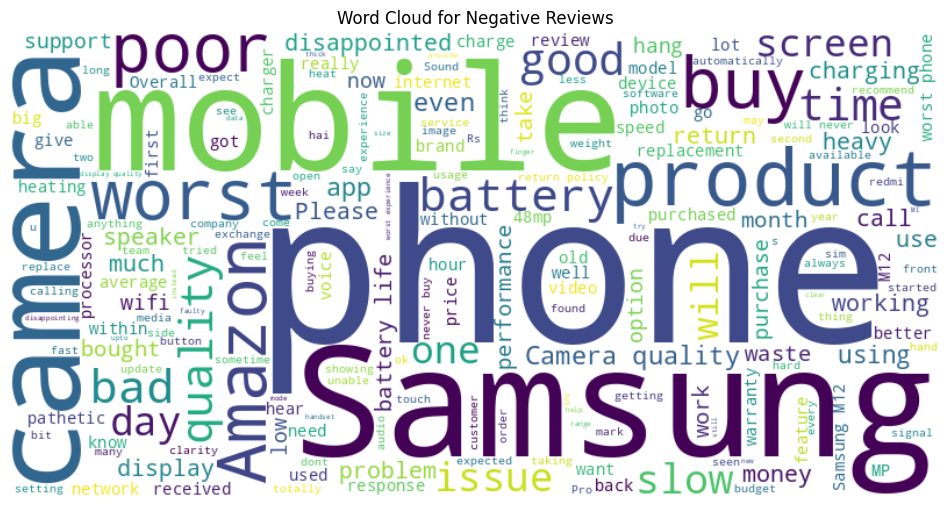

In [14]:
negative_reviews = ' '.join(df[df['sentiment'] == 'Negative']['body'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_reviews)
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Reviews')
plt.show()


# Sentiment by review length


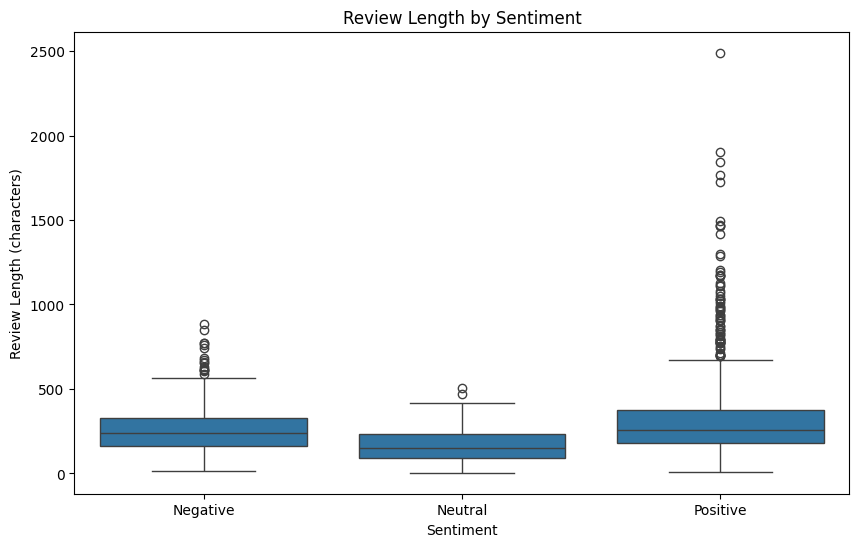

In [15]:
df['review_length'] = df['body'].apply(len)
plt.figure(figsize=(10, 6))
sns.boxplot(x='sentiment', y='review_length', data=df)
plt.title('Review Length by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Review Length (characters)')
plt.show()

In [16]:
# Select only numeric columns
df_numeric = df.select_dtypes(include=[np.number])
print("\nNumeric Columns:", df_numeric.columns.tolist())
print(df_numeric.corr())


Numeric Columns: ['rating', 'review_length']
                 rating  review_length
rating         1.000000      -0.007969
review_length -0.007969       1.000000


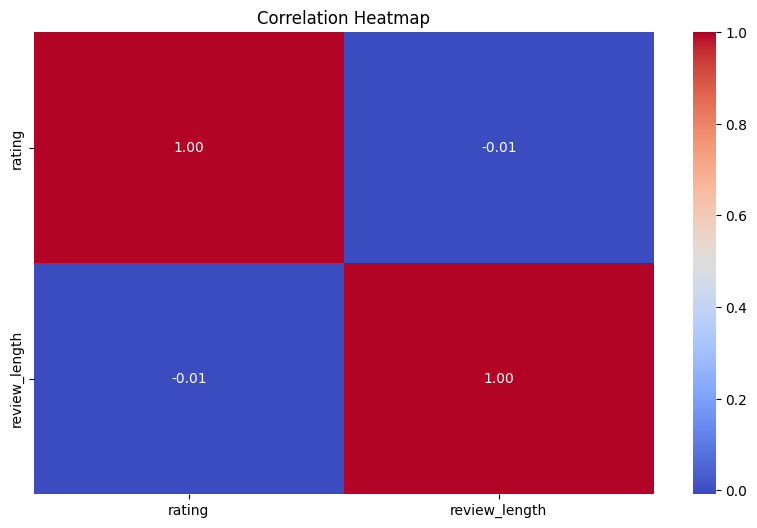

In [17]:
# Correlation Analysis
corr_matrix=df.corr(numeric_only=True)

# Plot the heatmap for the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


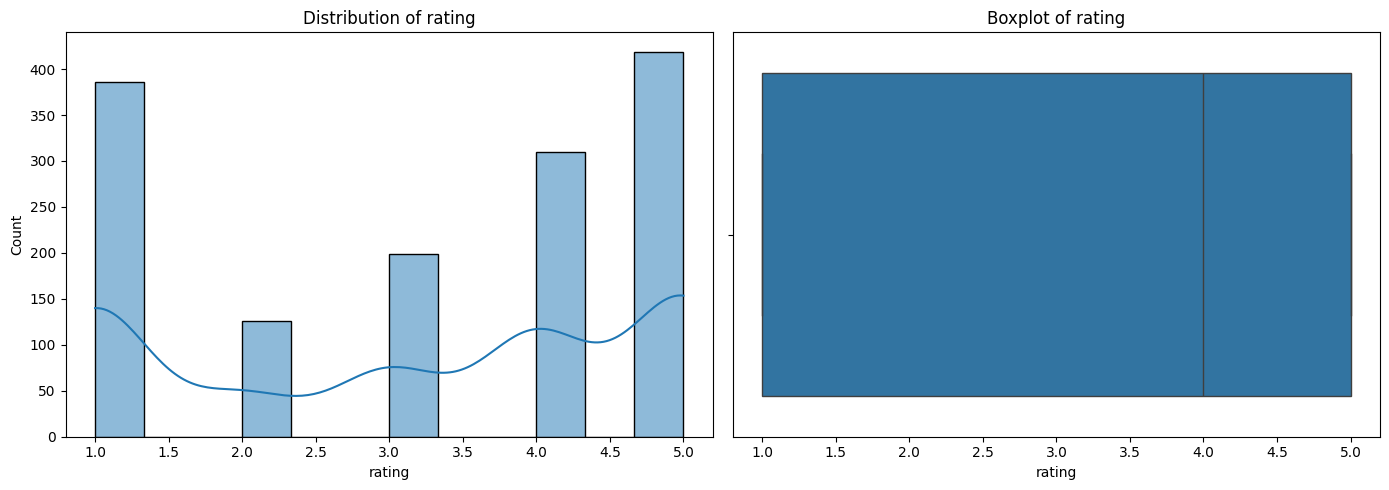

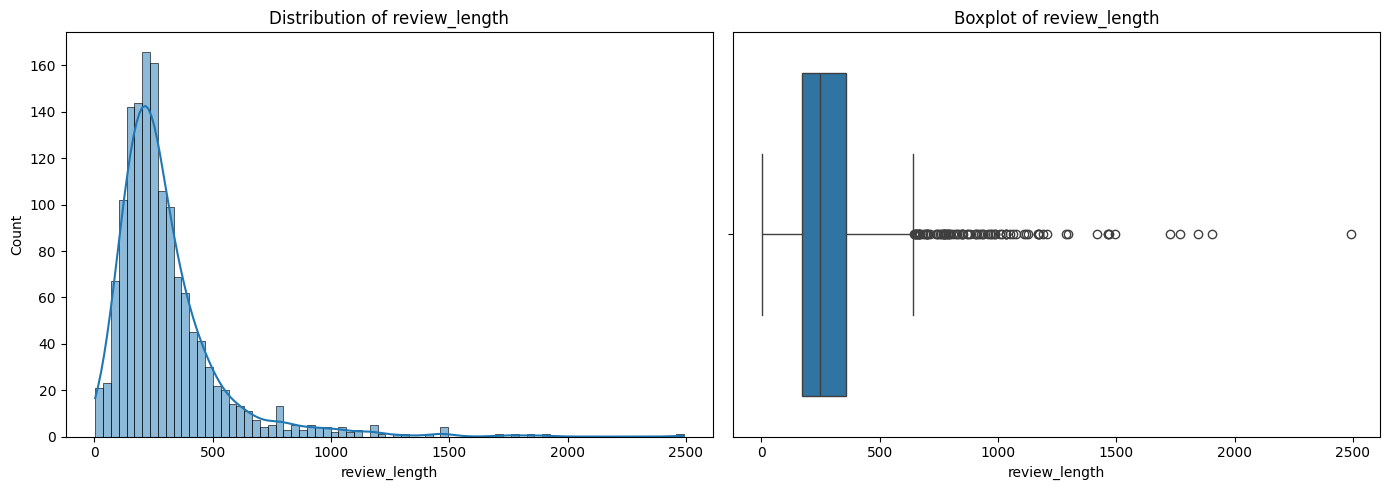

In [18]:
#Visualize Distributions and Outliers

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in numerical_cols:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Histogram with KDE (Kernel Density Estimate)
    sns.histplot(df[col].dropna(), kde=True, ax=axes[0])
    axes[0].set_title(f'Distribution of {col}')

    # Boxplot to visualize potential outliers
    sns.boxplot(x=df[col].dropna(), ax=axes[1])
    axes[1].set_title(f'Boxplot of {col}')

    plt.tight_layout()
    plt.show()


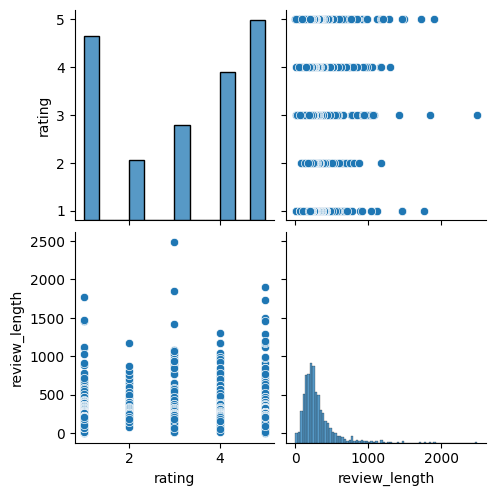

In [19]:
# Creating a pairplot for all numerical columns
sns.pairplot(df[numerical_cols].dropna())
plt.show()

# **3. Model Building**

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
#Vectorization
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
X = tfidf.fit_transform(df['body'])
y = df['sentiment']


In [23]:
X.shape, y.shape

((1440, 5000), (1440,))

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (1152, 5000)
Testing set size: (288, 5000)


In [31]:
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [32]:
y_pred = model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))



Classification Report:
               precision    recall  f1-score   support

    Negative       0.76      0.44      0.56        70
     Neutral       0.00      0.00      0.00        12
    Positive       0.80      0.96      0.87       206

    accuracy                           0.79       288
   macro avg       0.52      0.47      0.48       288
weighted avg       0.75      0.79      0.76       288



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


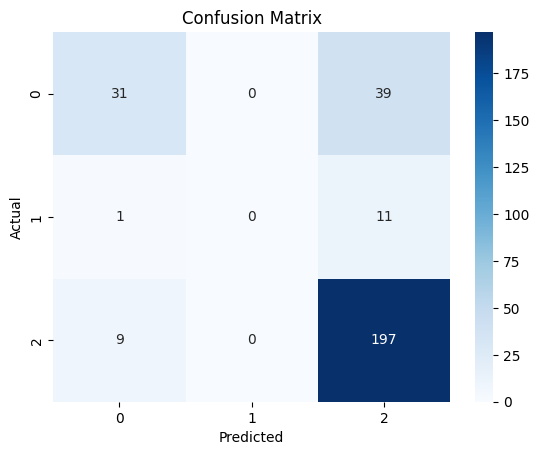

In [33]:

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Logistic Regression

In [25]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

print("Logistic Regression Results:")
print(classification_report(y_test, y_pred_lr))

Logistic Regression Results:
              precision    recall  f1-score   support

    Negative       0.76      0.44      0.56        70
     Neutral       0.00      0.00      0.00        12
    Positive       0.80      0.96      0.87       206

    accuracy                           0.79       288
   macro avg       0.52      0.47      0.48       288
weighted avg       0.75      0.79      0.76       288



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Multinomial Naive Bayes

In [26]:
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

print("Naive Bayes Results:")
print(classification_report(y_test, y_pred_nb))

Naive Bayes Results:
              precision    recall  f1-score   support

    Negative       0.33      0.01      0.03        70
     Neutral       0.00      0.00      0.00        12
    Positive       0.72      1.00      0.84       206

    accuracy                           0.72       288
   macro avg       0.35      0.34      0.29       288
weighted avg       0.60      0.72      0.60       288



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Random Forest

In [27]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("Random Forest Results:")
print(classification_report(y_test, y_pred_rf))

Random Forest Results:
              precision    recall  f1-score   support

    Negative       0.76      0.46      0.57        70
     Neutral       1.00      0.17      0.29        12
    Positive       0.81      0.96      0.88       206

    accuracy                           0.81       288
   macro avg       0.86      0.53      0.58       288
weighted avg       0.81      0.81      0.78       288



## SVM (LinearSVC)

In [28]:
from sklearn.svm import LinearSVC

svm_model = LinearSVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

In [29]:
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.8229166666666666
              precision    recall  f1-score   support

    Negative       0.69      0.64      0.67        70
     Neutral       1.00      0.17      0.29        12
    Positive       0.86      0.92      0.89       206

    accuracy                           0.82       288
   macro avg       0.85      0.58      0.61       288
weighted avg       0.82      0.82      0.81       288



In [30]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))

Logistic Regression Accuracy: 0.7916666666666666
Naive Bayes Accuracy: 0.7152777777777778
Random Forest Accuracy: 0.8055555555555556
SVM Accuracy: 0.8229166666666666


### --------------------- SVM (LinearSVC)	 gives the best accuracy
